In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams

warnings.filterwarnings(action='ignore')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False

In [2]:
path = './data/'

os.listdir(path)

['age_gender_info.csv',
 '.DS_Store',
 'test_df.csv',
 'test.csv',
 'test_preprocessed.csv',
 'train_errx_preprocessed.csv',
 'train_df_errx.csv',
 'train.csv',
 'train_preprocessed.csv',
 'train_df.csv',
 'sample_submission.csv']

In [3]:
train = pd.read_csv(path + "train_df.csv")
train_errx = pd.read_csv(path + 'train_df_errx.csv')
test = pd.read_csv(path + "test_df.csv")

train.shape, test.shape, train_errx.shape

((2952, 15), (1008, 14), (2896, 15))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        2952 non-null   object 
 1   총세대수        2952 non-null   int64  
 2   임대건물구분      2952 non-null   object 
 3   지역          2952 non-null   object 
 4   공급유형        2952 non-null   object 
 5   전용면적        2952 non-null   float64
 6   전용면적별세대수    2952 non-null   int64  
 7   공가수         2952 non-null   float64
 8   자격유형        2952 non-null   object 
 9   임대보증금       2383 non-null   object 
 10  임대료         2383 non-null   object 
 11  10분내지하철수    2741 non-null   float64
 12  10분내버스정류장수  2948 non-null   float64
 13  단지내주차면수     2952 non-null   float64
 14  등록차량수       2952 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 346.1+ KB


## 결측치에 0을 넣은 경우

In [5]:
# 결측치 확인
train[['임대보증금','임대료']].isnull().sum()

임대보증금    569
임대료      569
dtype: int64

In [6]:
# 결측치 0으로 채우기
train.fillna(0, inplace=True)
train[['임대보증금','임대료']].isnull().sum()

임대보증금    0
임대료      0
dtype: int64

In [7]:
train[(train['임대보증금'].str.contains('-',na=False))|(train['임대료'].str.contains('-',na=False))]


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
2043,N2085,1339,아파트,서울특별시,장기전세,23.32,51,9.0,A,87444000,-,0.0,3.0,1590.0,1595.0
2044,N2085,1339,아파트,서울특별시,장기전세,46.79,4,9.0,A,174888000,-,0.0,3.0,1590.0,1595.0
2045,N2085,1339,아파트,서울특별시,장기전세,46.91,69,9.0,A,174888000,-,0.0,3.0,1590.0,1595.0
2046,N2085,1339,아파트,서울특별시,장기전세,51.96,24,9.0,A,194562000,-,0.0,3.0,1590.0,1595.0
2047,N2085,1339,아파트,서울특별시,장기전세,51.99,80,9.0,A,194562000,-,0.0,3.0,1590.0,1595.0
2048,N2085,1339,아파트,서울특별시,장기전세,59.93,142,9.0,A,216423000,-,0.0,3.0,1590.0,1595.0
2100,C1039,790,아파트,서울특별시,장기전세,51.32,126,13.0,A,187694000,-,0.0,3.0,673.0,645.0
2101,C1039,790,아파트,서울특별시,장기전세,59.88,49,13.0,A,213863000,-,0.0,3.0,673.0,645.0
2102,C1039,790,아파트,서울특별시,장기전세,59.94,75,13.0,A,213863000,-,0.0,3.0,673.0,645.0
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0


In [8]:
train['임대보증금'] = train['임대보증금'].str.replace('-','0')
train['임대료'] = train['임대료'].str.replace('-','0')
train[(train['임대보증금'].str.contains('-',na=False))|(train['임대료'].str.contains('-',na=False))]


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        2952 non-null   object 
 1   총세대수        2952 non-null   int64  
 2   임대건물구분      2952 non-null   object 
 3   지역          2952 non-null   object 
 4   공급유형        2952 non-null   object 
 5   전용면적        2952 non-null   float64
 6   전용면적별세대수    2952 non-null   int64  
 7   공가수         2952 non-null   float64
 8   자격유형        2952 non-null   object 
 9   임대보증금       2383 non-null   object 
 10  임대료         2383 non-null   object 
 11  10분내지하철수    2952 non-null   float64
 12  10분내버스정류장수  2952 non-null   float64
 13  단지내주차면수     2952 non-null   float64
 14  등록차량수       2952 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 346.1+ KB


In [10]:
train[['임대보증금','임대료']] = train[['임대보증금','임대료']].astype('float')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        2952 non-null   object 
 1   총세대수        2952 non-null   int64  
 2   임대건물구분      2952 non-null   object 
 3   지역          2952 non-null   object 
 4   공급유형        2952 non-null   object 
 5   전용면적        2952 non-null   float64
 6   전용면적별세대수    2952 non-null   int64  
 7   공가수         2952 non-null   float64
 8   자격유형        2952 non-null   object 
 9   임대보증금       2383 non-null   float64
 10  임대료         2383 non-null   float64
 11  10분내지하철수    2952 non-null   float64
 12  10분내버스정류장수  2952 non-null   float64
 13  단지내주차면수     2952 non-null   float64
 14  등록차량수       2952 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 346.1+ KB


Text(0, 0.5, '임대료')

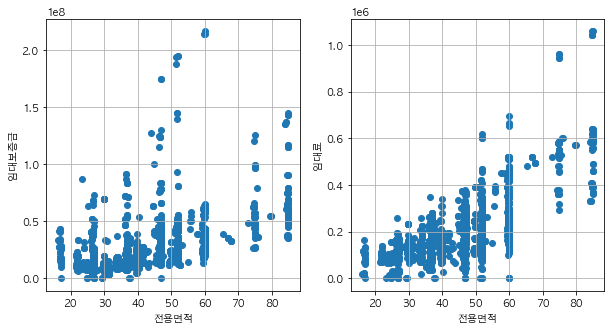

In [11]:
x = train['전용면적']
y1 = train['임대보증금']
y2 = train['임대료']

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(x, y1)
plt.grid()
plt.xlabel("전용면적")
plt.ylabel("임대보증금")

plt.subplot(122)
plt.scatter(x, y2)
plt.grid()
plt.xlabel("전용면적")
plt.ylabel("임대료")

In [12]:
train.corr()['전용면적']

총세대수          0.045705
전용면적          1.000000
전용면적별세대수     -0.035479
공가수          -0.089201
임대보증금         0.494163
임대료           0.735261
10분내지하철수     -0.011591
10분내버스정류장수   -0.010087
단지내주차면수       0.071260
등록차량수         0.116432
Name: 전용면적, dtype: float64

## 결측치가 있는 데이터는 제외한 경우

In [13]:
train = pd.read_csv(path + "train_df.csv")
train_errx = pd.read_csv(path + 'train_df_errx.csv')
test = pd.read_csv(path + "test_df.csv")

train.shape, test.shape, train_errx.shape

((2952, 15), (1008, 14), (2896, 15))

In [14]:
train.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         569
임대료           569
10분내지하철수      211
10분내버스정류장수      4
단지내주차면수         0
등록차량수           0
dtype: int64

In [15]:
df = train[~train['임대보증금'].str.contains('-',na=True)]
df = df[~df['임대료'].str.contains('-', na=True)]
df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
0,ERR04_2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,ERR04_2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,ERR04_2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,ERR04_2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,ERR04_2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [16]:
df['임대보증금'] = df['임대보증금'].astype('float')
df['임대료'] = df['임대료'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2362 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        2362 non-null   object 
 1   총세대수        2362 non-null   int64  
 2   임대건물구분      2362 non-null   object 
 3   지역          2362 non-null   object 
 4   공급유형        2362 non-null   object 
 5   전용면적        2362 non-null   float64
 6   전용면적별세대수    2362 non-null   int64  
 7   공가수         2362 non-null   float64
 8   자격유형        2362 non-null   object 
 9   임대보증금       2362 non-null   float64
 10  임대료         2362 non-null   float64
 11  10분내지하철수    2285 non-null   float64
 12  10분내버스정류장수  2358 non-null   float64
 13  단지내주차면수     2362 non-null   float64
 14  등록차량수       2362 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 295.2+ KB


<AxesSubplot:>

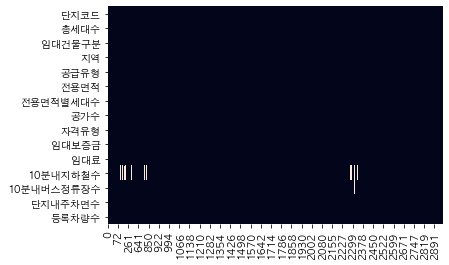

In [17]:
sns.heatmap(df.isnull().T,cbar=False)

Text(0, 0.5, '임대료')

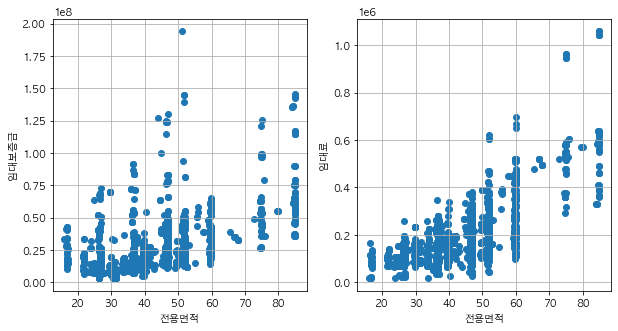

In [18]:
x = df['전용면적']
y1 = df['임대보증금']
y2 = df['임대료']

plt.figure(figsize=(10,5))
# plt.style.use("ggplot")
plt.subplot(121)
plt.scatter(x, y1)
plt.grid()
plt.xlabel("전용면적")
plt.ylabel("임대보증금")

plt.subplot(122)
plt.scatter(x, y2)
plt.grid()
plt.xlabel("전용면적")
plt.ylabel("임대료")

In [19]:
df.corr()['전용면적']

총세대수         -0.053443
전용면적          1.000000
전용면적별세대수     -0.088195
공가수          -0.196315
임대보증금         0.534966
임대료           0.740591
10분내지하철수     -0.036340
10분내버스정류장수    0.017429
단지내주차면수       0.168239
등록차량수         0.327957
Name: 전용면적, dtype: float64